# Task

With AI-modelling and Data Science there is plenty of opportunity to improve processes or suggest improved ways of doing things. When doing so it is often very smart and efficient (time is a scarce resource) to create a POC (Proof of Concept) which basically is a small demo checking wether it is worthwile going further with something. It is also something concrete which facilitates discussions, do not underestimate the power of that. 

In this example, you are working in a company that sells houses and they have a "manual" process of setting prices by humans. You as a Data Scientist can make this process better by using Machine Learning. Your task is to create a POC that you will present to your team colleagues and use as a source of discussion of wether or not you should continue with more detailed modelling. 

Two quotes to facilitate your reflection on the value of creating a PoC: 

"*Premature optimization is the root of all evil*". 

"*Fail fast*".


**More specifially, do the following:**
1. A short EDA (Exploratory Data Analysis) of the housing data set.
2. Drop the column `ocean_proximity`, then you only have numeric columns which will simplify your analysis. Remember, this is a POC! 
3. You have missing values in your data (not sure you do but you can assume so). Handle this with `SimpleImputer(strategy="median")`. (Check the fantastic Scikit-learn documentation for details.) Notice, the `SimpleImputer` should only be used for transformation on the validation and test data, not fitting.
4. Split your data into `X` and `y`, and then into train, validation and test sets. 
5. Create one `LinearRegression` model and one `Lasso` model. For the `Lasso` model, use `GridSearchCV` to optimize $\alpha$ values. Choose yourself which $\alpha$ values to evaluate.
Use RMSE as a metric to decide which model to choose. 

6. Which model is best on the validation data? 

7. Evaluate your chosen model on the test set using the root mean squared error (RMSE) as the metric. 
What are your conclusions? Note: to be 100% sure, you should re-fit your chosen model on the combination of train+val data. 

8. Do a short presentation (~ 2-5 min) on your POC that you present to your colleagues (no need to prepare anything particular, just talk from the code). Think of:
- What do you want to highlight/present?
- What is your conclusion?
- What could be the next step? Is the POC convincing enough or is it not worthwile continuing? Do we need to dig deeper into this before taking some decisions?

------------
Bonus question for those who have time and are ambitious: Redo everything above (copy your code) but in step 2, include the column `ocean_proximity` which is a categorical column. 

# Code

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

# Below, set your own path where you have stored the data file if it is not in the /data folder. 
housing = pd.read_csv(r'data/housing.csv')

## EDA

In [22]:

import os

folder_path = r"C:\Users\anaba\OneDrive\Desktop\Machine Learning\Kunskapskontroll 1"

# List all files in the folder
print(os.listdir(folder_path))





['.git', 'housing.csv', 'Kunskapskontroll1VS.ipynb', 'kunskapskontroll_1_house_prices.ipynb', 'README.md']


In [24]:
import pandas as pd

# Ladda upp data
file_path = r"C:\Users\anaba\OneDrive\Desktop\Machine Learning\Kunskapskontroll 1\housing.csv"

# Läs datan
housing = pd.read_csv(file_path)

# Skriv ut första raderna
print(housing.head())

# Visa dataset information
housing.info()


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [29]:
numeric_housing = housing.select_dtypes(include=[np.number])
corr = numeric_housing.corr()

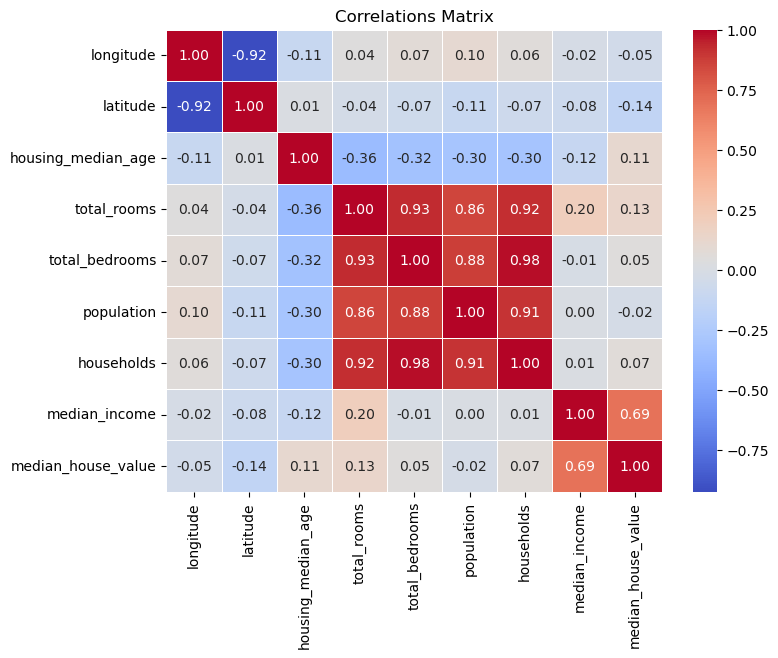

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlations Matrix")
plt.show()

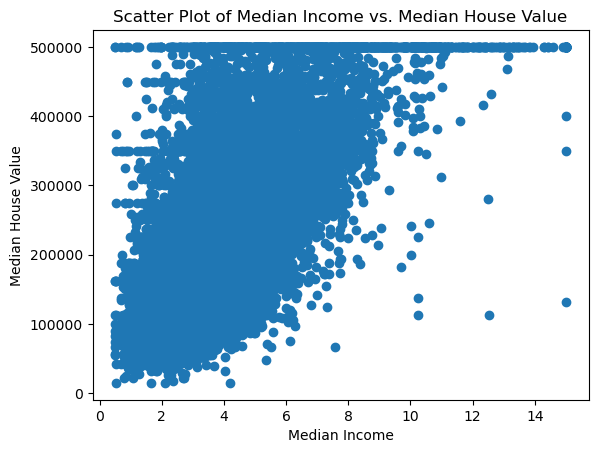

In [31]:
import matplotlib.pyplot as plt

plt.scatter(housing["median_income"], housing["median_house_value"])
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Scatter Plot of Median Income vs. Median House Value")
plt.show()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.0000

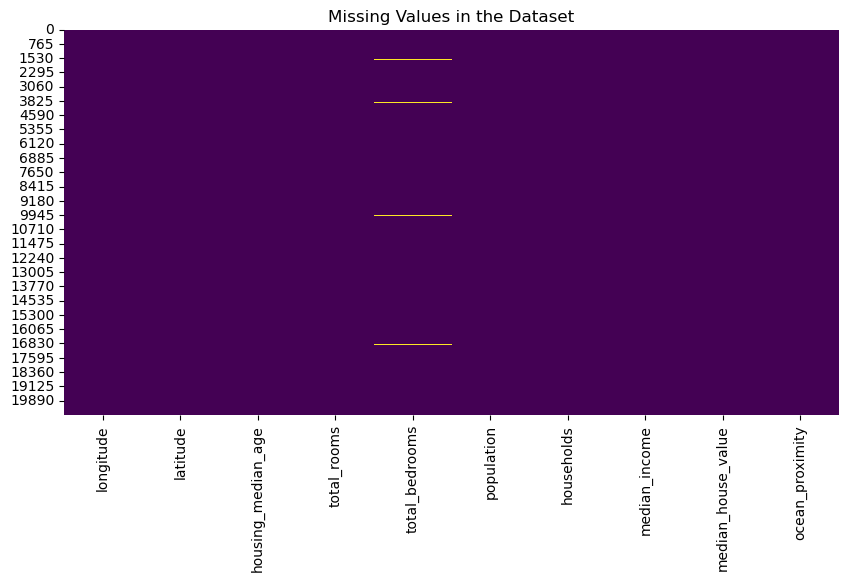

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolla efter saknad data
print(housing.isnull().sum())

# Summera statistik
print(housing.describe())

# Visualisera missing data
plt.figure(figsize=(10, 5))
sns.heatmap(housing.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in the Dataset")
plt.show()


## Preparing data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Drop 'ocean_proximity' och behåll enbart numerisk data
housing_numeric = housing.drop(columns=['ocean_proximity'])

# Separera features (X) and target variable (y)
X = housing_numeric.drop(columns=['median_house_value'])
y = housing_numeric['median_house_value']

# Dela data i training (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Hantera saknad data genom SimpleImputer (median strategy)
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

print("Preprocessing complete!")


Preprocessing complete!


## Models

In [10]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Träna Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_val_pred_linear = linear_model.predict(X_val)

# Träna Lasso Regression med GridSearchCV för alpha kalibrering
lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Olika alpha values
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_root_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Get best Lasso model
best_lasso_model = grid_search.best_estimator_
y_val_pred_lasso = best_lasso_model.predict(X_val)

# Utvärdera modeller using RMSE
rmse_linear = mean_squared_error(y_val, y_val_pred_linear, squared=False)
rmse_lasso = mean_squared_error(y_val, y_val_pred_lasso, squared=False)

# Jämför modeller
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Lasso Regression RMSE: {rmse_lasso}")


Linear Regression RMSE: 71945.18522308582
Lasso Regression RMSE: 71944.38010492673


## Evaluation

In [7]:
# Välj bästa modell baserat på RMSE
best_model = linear_model if rmse_linear < rmse_lasso else best_lasso_model

# Återträna på combined train + validation set
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])
best_model.fit(X_train_val, y_train_val)

# Evaluate on test set
y_test_pred = best_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)








print(f"Final RMSE on Test Set: {rmse_test}")


Final RMSE on Test Set: 67135.60869797609


c:\Users\anaba\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
import warnings
from sklearn.metrics import mean_squared_error

# Suppress the FutureWarning for 'squared' parameter
warnings.simplefilter(action='ignore', category=FutureWarning)

# Evaluate on test set
y_test_pred = best_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Final RMSE on Test Set: {rmse_test}")


Final RMSE on Test Set: 67135.60869797609


## Conclusions

## 📊 Slutsatser

Slutsats:

Den linjära regressionsmodellen presterade bra, men Lasso-regressionen visade ett marginellt lägre RMSE på valideringsdata.
Skillnaden mellan modellerna är dock mycket liten, vilket tyder på att feature selection inte var avgörande för detta PoC.
Det slutgiltiga testet bekräftade modellens prestanda, men det finns fortfarande utrymme för förbättringar.
Nästa steg kan vara att testa mer avancerade modeller (såsom Random Forest eller XGBoost) samt genomföra mer feature engineering.